In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
df = pd.read_csv("Customer Churn.csv")
# df.head(30)
df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.info()
# print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# replace blamnks wih  0 as and 
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.isnull() . sum() . sum()
print(df)

df.describe()
print(df)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [14]:
df["customerID"].duplicated() . sum()
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [15]:
# vonverted 0 and 1 values of senior citizen to yes/no to make it easier to under
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
    
df["SeniorCitizen"] = df["SeniorCitizen"] . apply(conv)
print(df.head(10))

   customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            no     Yes         No       1           No   
1  5575-GNVDE    Male            no      No         No      34          Yes   
2  3668-QPYBK    Male            no      No         No       2          Yes   
3  7795-CFOCW    Male            no      No         No      45           No   
4  9237-HQITU  Female            no      No         No       2          Yes   
5  9305-CDSKC  Female            no      No         No       8          Yes   
6  1452-KIOVK    Male            no      No        Yes      22          Yes   
7  6713-OKOMC  Female            no      No         No      10           No   
8  7892-POOKP  Female            no     Yes         No      28          Yes   
9  6388-TABGU    Male            no      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ..

Text(0.5, 1.0, 'Count of customer by Churn')

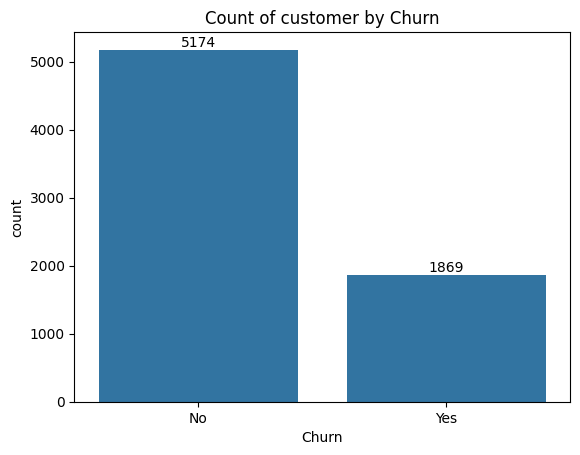

In [16]:
# form the given pie chart
ax = sns.countplot(x = df["Churn"] , data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of customer by Churn")


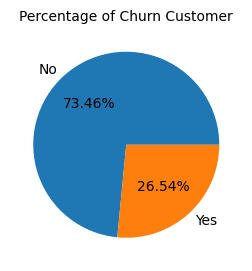

In [17]:
plt.figure(figsize=(3,4))
gb = df.groupby("Churn") .agg({"Churn":"count"})
plt.pie(gb["Churn"], labels= gb.index, autopct= "%1.2f%%" )
plt.title("Percentage of Churn Customer", fontsize =10)
plt.show()


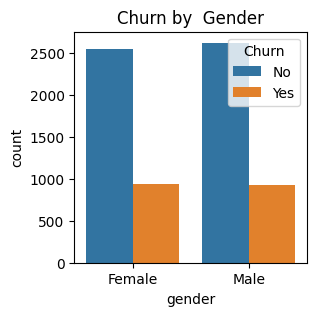

In [18]:
plt.figure(figsize=(3,3))
sns.countplot(x = "gender", data=df , hue ="Churn")
plt.title("Churn by  Gender")
plt.show()


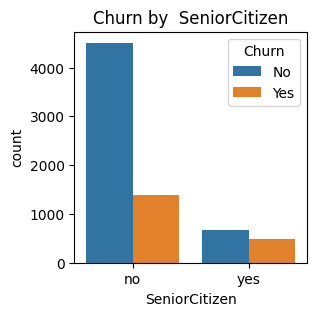

In [19]:
plt.figure(figsize=(3,3))
sns.countplot(x = "SeniorCitizen", data=df , hue ="Churn")
plt.title("Churn by  SeniorCitizen")
plt.show()

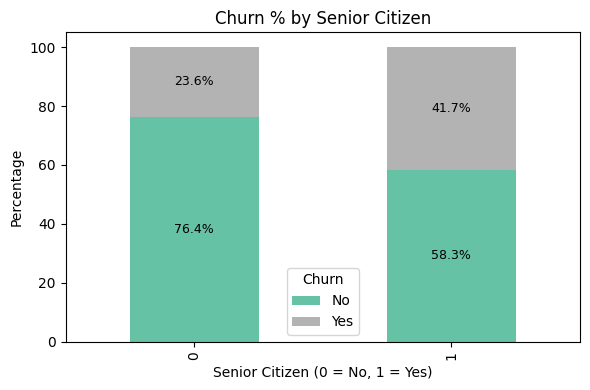

In [20]:

# Read data
df = pd.read_csv("Customer Churn.csv")

# Step 1: Group data and count
data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Step 2: Normalize to percentage
percent_data = data.div(data.sum(axis=1), axis=0) * 100

# Step 3: Plot
ax = percent_data.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='Set2')

# Step 4: Add percentage labels
for idx, row in percent_data.iterrows():
    cumulative = 0
    for col in percent_data.columns:
        percent = row[col]
        if percent > 0:
            plt.text(x=idx, 
                     y=cumulative + percent / 2, 
                     s=f"{percent:.1f}%", 
                     ha='center', 
                     va='center', 
                     fontsize=9)
            cumulative += percent

# Step 5: Customize plot
plt.title("Churn % by Senior Citizen")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


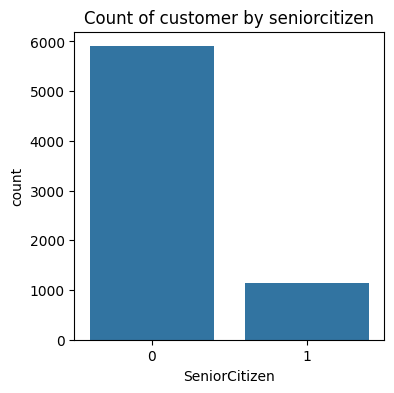

In [21]:
# comparative a great percentage of people in senior citizen 

plt.figure(figsize=(4,4))
sns.countplot(x = "SeniorCitizen", data=df )
ax.bar_label(ax.containers[0])
plt.title("Count of customer by seniorcitizen")
plt.show()

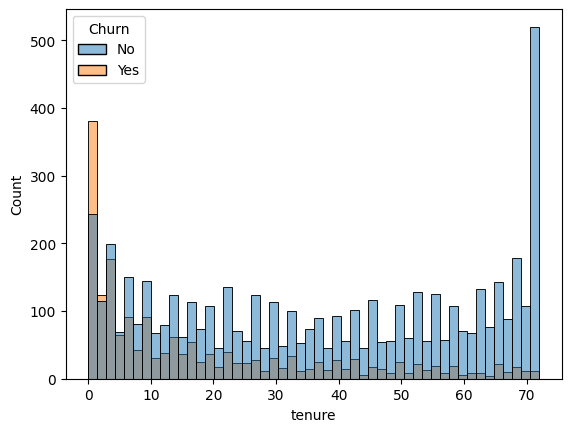

In [ ]:
plt.Figure(figsize=(9,4))
sns.histplot(x = "tenure" , data=df  , bins=50, hue="Churn")
plt.show()
# poeple whohave used our servies for a long time stayed  and people who have used our service
#  #1 or 2 months have churn

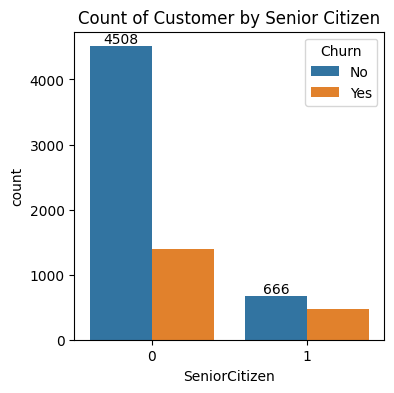

In [ ]:


plt.figure(figsize=(4,4))
ax=sns.countplot(x = "SeniorCitizen" , data=df , hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Senior Citizen")
plt.show()

In [ ]:
# people who have month to month contract are likely to chirn then from those who have 1 or 2 years or contract.
df.columns.values
df.array(["customerID"	,"gender",	"SeniorCitizen"	,"Partner",	"Dependents"	,"tenure",	"PhoneService"	,"MultipleLines"	,"InternetService",	"OnlineSecurity", "DeviceProtection",	"TechSupport",	"StreamingTV",	"StreamingMovies",	"Contract",
"PaperlessBilling",	"PaymentMethod",	"MonthlyCharges",	"TotalCharges"	,"Churn"] ,dtype =object)
# plt.show()


AttributeError: 'DataFrame' object has no attribute 'array'

C:\Users\Vishal\AppData\Local\Temp\ipykernel_18132\1848629205.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[idx], palette="Set2" )
C:\Users\Vishal\AppData\Local\Temp\ipykernel_18132\1848629205.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[idx], palette="Set2" )
C:\Users\Vishal\AppData\Local\Temp\ipykernel_18132\1848629205.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[idx], palette="Set2" )
C:\Users\Vishal\AppData\Local\Temp\ipykernel_18132\1848

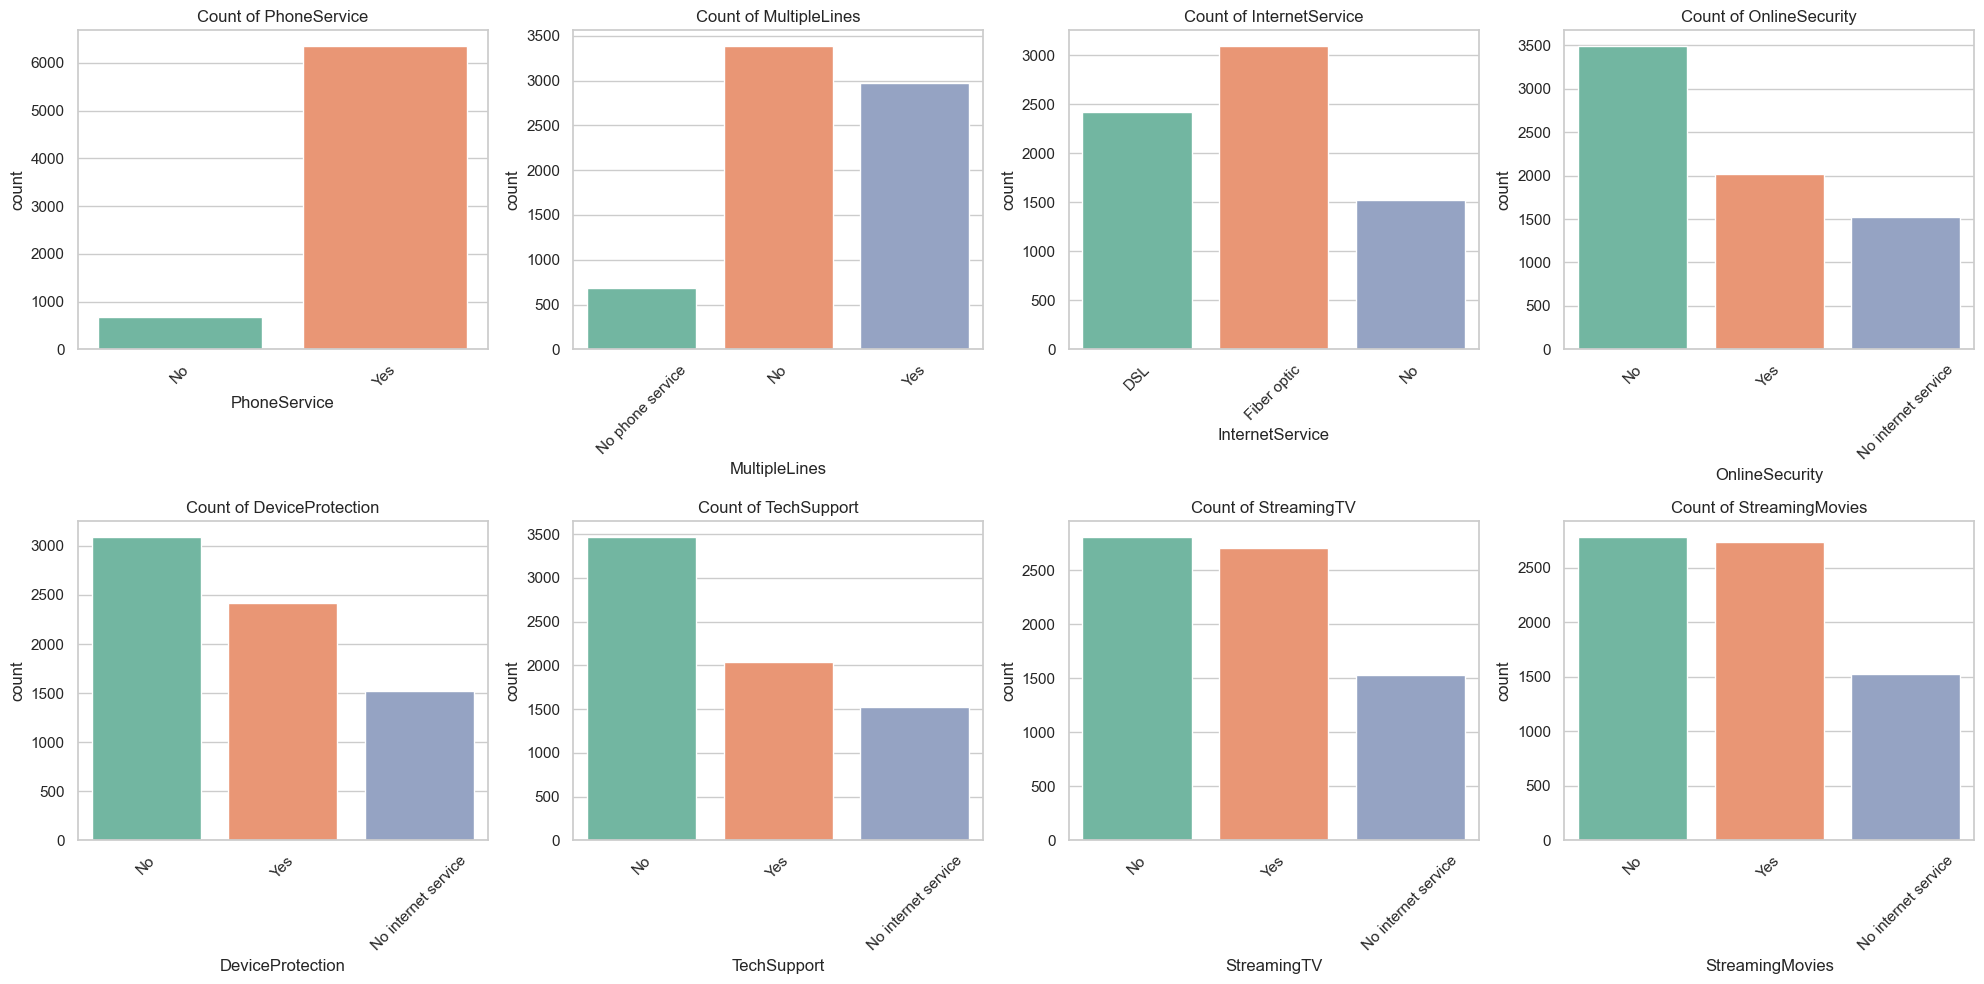

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample: Load your dataset
# df = pd.read_csv("your_dataset.csv")
# For demo: assume 'df' is already loaded with the mentioned columns

columns = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
           "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

# Set plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))  # 2 rows x 4 columns = 8 subplots
axes = axes.flatten()  # Flatten to easily iterate

# Loop through columns and create countplot
for idx, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[idx], palette="Set2" )
    axes[idx].set_title(f"Count of {col}")
    axes[idx].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


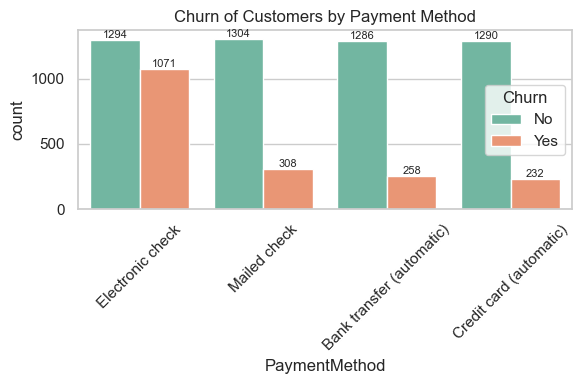

In [ ]:

# Customer is likely to churn when he is using electronic check as a payment method
# 🧹 Step 1: Clean your column names to remove spaces, tabs, etc.
df.columns = df.columns.str.strip()

# ✅ Step 2: Plot the countplot correctly
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="PaymentMethod", data=df, hue="Churn", palette="Set2")

# 🏷️ Step 3: Add bar labels to all bars (not just 1 group)
for container in ax.containers:
    ax.bar_label(container, fontsize=8)

# 🎨 Step 4: Titles and formatting
plt.title("Churn of Customers by Payment Method")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()